In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

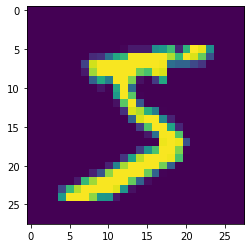

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_zeros = X_train[y_train == 0]

In [8]:
X_train.shape

(60000, 28, 28)

In [7]:
only_zeros.shape

(5923, 28, 28)

In [9]:
only_zeros[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         28, 195, 254, 254, 254, 254, 254, 255,  61,   0,   0,   0,   0,
          0,   0],
       [  

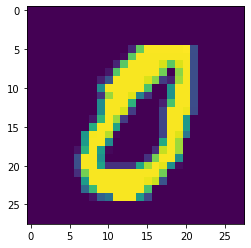

In [10]:
plt.imshow(only_zeros[10])

In [11]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import load_model

In [14]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation = 'relu'))

# final output layer
# performing a binary classification of is image real or fake
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',
                      optimizer='adam')

discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 132,951
Non-trainable params: 0
_________________________________________________________________


In [15]:
# like autoencoder 784 --> 300 --> 150 --> 30 --> 150 --> 300 --> 784
# need to find lowest latent layer
# generator looks like a decoder
# coding size should be much smaller than original feature size 784
# coding size of 100 is similar to 30

coding_size = 100

generator = Sequential()

In [17]:
generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [18]:
generator.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [19]:
GAN = Sequential([generator, discriminator])

In [20]:
# do not train in second phase

discriminator.trainable = False

In [21]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [22]:
# set batch_size

batch_size = 32

In [23]:
# set this so you can do my_data = X_train for a full run

my_data = only_zeros

In [25]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [26]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [27]:
# check sizes
5923/32

185.09375

In [28]:
# batch size is 32, shape is 5923
# use 185 batches, drop the remaining images .09 X 32 ~4 images

dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [49]:
epochs = 2

In [50]:
GAN.layers

In [51]:
GAN.layers[0].layers

In [52]:
GAN.layers[1].layers

In [53]:
# alternate way to access the two models

GAN.layers[1].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               117750    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [54]:
# list expansion

[0.0]*10

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [55]:
[[0.0]*batch_size] + [[1.0]]*batch_size

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [56]:
generator, discriminator = GAN.layers


# need to do a training loop

for epoch in range(epochs):
    print(f"Current on EPoch {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        
        i +=1
        
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
            
        # Discriminator training phase
        # start with noise
        
        noise = tf.random.normal(shape = [batch_size, coding_size])
        
        # try to produce image
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        # create labels
        # generates list of 0.0 for fake and 1.0 for real images for each batch size
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        # train generator
        # want discriminator to belive that fake images are real
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        y2 = tf.constant([[1.0]]*batch_size)
        
        # reset discriminator
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)




Current on EPoch 1
	 Currently on batch number 100 of 185
Current on EPoch 2
	 Currently on batch number 100 of 185


In [57]:
noise = tf.random.normal(shape=[10, coding_size])

In [58]:
noise.shape

TensorShape([10, 100])

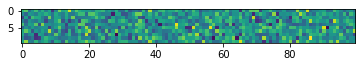

In [59]:
plt.imshow(noise)

In [60]:
images = generator(noise)
images.shape

TensorShape([10, 28, 28])

In [61]:
images[0]

<tf.Tensor: shape=(28, 28), dtype=float32, numpy=
array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

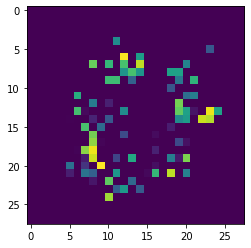

In [62]:
plt.imshow(images[0])

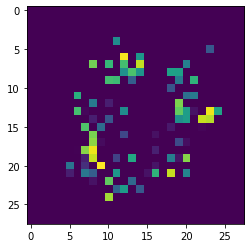

In [63]:
plt.imshow(images[1])

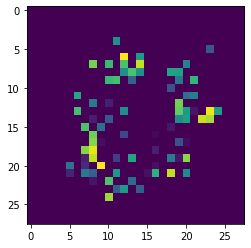

In [64]:
plt.imshow(images[7])

In [48]:
# all images are same - having mode collapse found first image that works

# Make a Deep Convulational GAN

### Uses a tanh activation function for the last layer so need to reshape X_train to be within -1 and1

In [65]:
# normalize color from 0 to 1

X_train = X_train/255

In [66]:
# multiply by 2 goes from 0 to 2, subtract 1 generates from -1 to 1

X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [67]:
X_train.min()

-1.0

In [68]:
X_train.max()

1.0

## Filter out for Faster Traning on Smaller Dataset

In [70]:
only_zeros = X_train[y_train==0]

In [71]:
only_zeros.shape

(5923, 28, 28, 1)

In [72]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Dropout,LeakyReLU,Flatten,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [74]:
# build the generator

generator = Sequential()

# choose the value 128 choose any value
generator.add(Dense(7 * 7 * 128, input_shape=[codings_size]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())

# kernel_size can experiemnt, 64 kernels is variable
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))

generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [75]:
generator.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
______________________________________________

In [76]:
# build the discriminator
# the discriminator is essnetially a mirror image
# start with the 64 and expand upward

discriminator = Sequential()

# starts at 64 where last Conv2D layer ended, layer has dropout
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))

# next layer
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))

discriminator.add(Dropout(0.5))
discriminator.add(Flatten())

# sigmoid for real vs fake classification
discriminator.add(Dense(1, activation="sigmoid"))

In [77]:
discriminator.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6273      
Total params: 212,865
Trainable params: 212,865
Non-trainable params: 0
________________________________________________

In [78]:
# combine for GAN
GAN = Sequential([generator, discriminator])

In [79]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False

In [80]:
# compile

GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [81]:
GAN.layers

In [82]:
GAN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_5 (Sequential)    (None, 28, 28, 1)         840705    
_________________________________________________________________
sequential_6 (Sequential)    (None, 1)                 212865    
Total params: 1,053,570
Trainable params: 840,321
Non-trainable params: 213,249
_________________________________________________________________


In [83]:
GAN.layers[0].summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        204864    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1601      
Total params: 840,705
Trainable params: 840,321
Non-trainable params: 384
______________________________________________

In [84]:
GAN.layers[1].summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 64)        1664      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 6273      
Total params: 212,865
Trainable params: 0
Non-trainable params: 212,865
________________________________________________

### Set up for running

In [85]:
import tensorflow as tf

In [86]:
batch_size = 32

In [87]:
# my_data = X_train
my_data = only_zeros

In [88]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [89]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [90]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [91]:
epochs = 20

NOTE: The generator never actually sees any real images. It learns by viewing the gradients going back through the discriminator. The better the discrimnator gets through training, the more information the discriminator contains in its gradients, which means the generator can being to make progress in learning how to generate fake images, in our case, fake zeros.

## Training Loop

In [92]:
import plaidml.keras
plaidml.keras.install_backend()
from keras import backend as K

In [93]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%20 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 2
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185
	Currently on batch number 160 of 185
	Currently on batch number 180 of 185
Currently on Epoch 3
	Currently on batch number 20 of 185
	Currently on batch number 40 of 185
	Currently on batch number 60 of 185
	Currently on batch number 80 of 185
	Currently on batch number 100 of 185
	Currently on batch number 120 of 185
	Currently on batch number 140 of 185

In [94]:
# Most likely your generator will only learn to create one type of noisey zero
# Regardless of what noise is passed in.

In [95]:
noise = tf.random.normal(shape=[10, codings_size])

In [96]:
noise.shape

TensorShape([10, 100])

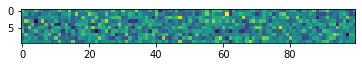

In [97]:
plt.imshow(noise)

In [98]:
images = generator(noise)

In [99]:
single_image = images[0]

In [ ]:
# single_image.numpy().reshape(28,28)

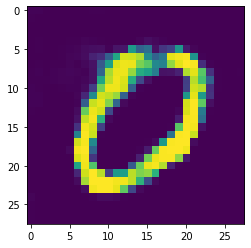

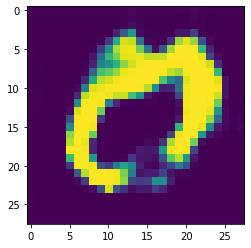

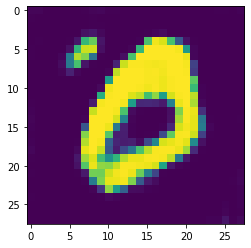

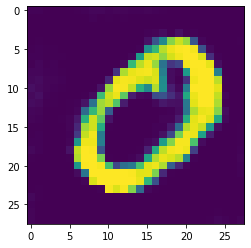

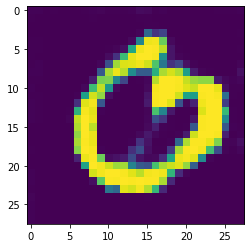

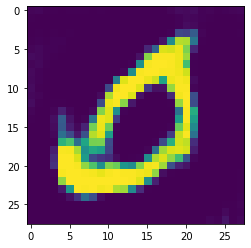

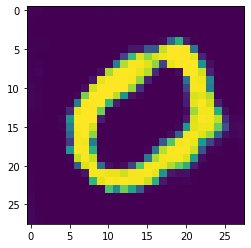

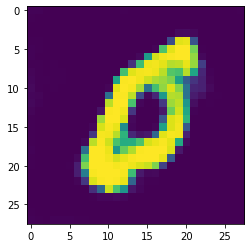

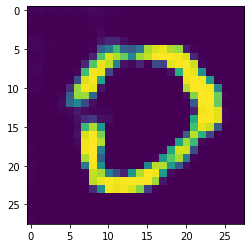

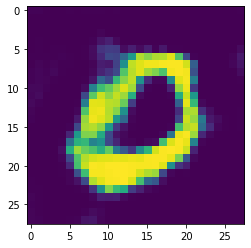

In [100]:
for image in images:
    plt.imshow(image.numpy().reshape(28,28))
    plt.show()